Create an image classifier

In [1]:
#%pip install tensorflow
#%pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tensorflow as tf
from tensorflow import keras

from src.functions import load_fashion_mnist_data
from src.lists import class_names
from src.models import (
    create_sequential_model,
    compile_model,
    fit_model,
)


print('Tensorflow version', tf.__version__)
print('Keras version', keras.__version__)

Tensorflow version 2.9.1
Keras version 2.9.0


## Using Keras to Load the Dataset

In [3]:
X_train, X_test, X_valid, y_train, y_test, y_valid = load_fashion_mnist_data()
print("")
print("The class names are the following:\n", class_names)

Loading data ... 
X_train shape (55000, 28, 28)
X_train dtype float64
X_test shape (10000, 28, 28)
X_test dtype uint8
X_valid shape (5000, 28, 28)
X_valid dtype float64
y_train shape (55000,)
y_train dtype uint8
y_test shape (10000,)
y_test dtype uint8
y_valid shape (5000,)
y_valid dtype uint8

The class names are the following:
 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Creating the Model Using the Sequential API

In [4]:
model = create_sequential_model(input_shape_dim=28)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None

Layers:


In [5]:
"""
For a Dense layer, we have access to  the connection weights and the bias terms:
"""
weights, biases = model.layers[3].get_weights()
print("Weights of layer 4:\n", weights)
print("Shape of weights of layer 4:\n",weights.shape)
print("Biases of layer 4:\n",biases)
print("Shape of biases of layer 4:\n",biases.shape)

Weights of layer 4:
 [[-1.49760425e-01 -1.51421726e-01 -7.83219486e-02  1.47717595e-01
  -1.99836671e-01 -1.03376552e-01 -1.12721704e-01  1.34516656e-01
  -1.26175731e-01 -6.01480454e-02]
 [ 1.55778110e-01  2.24623978e-02 -1.95719391e-01 -4.02305573e-02
   2.14899093e-01 -1.81776911e-01 -5.05858958e-02 -1.38615072e-02
   6.14345074e-04 -2.83226073e-02]
 [-5.33679128e-02 -3.82735878e-02  1.78700507e-01 -1.81647450e-01
   8.34839642e-02 -1.82183772e-01  3.46474349e-02  4.98587489e-02
  -2.04360589e-01  1.41282350e-01]
 [ 1.73235834e-02  1.05367362e-01 -1.75732404e-01  1.17710710e-01
  -2.07308382e-01  2.10682839e-01  1.10899061e-02  1.97631627e-01
  -5.16218692e-02 -1.60088599e-01]
 [-1.74127787e-01  5.32238781e-02 -2.09071621e-01 -2.29098856e-01
   5.69108427e-02 -2.09884644e-01 -1.89294174e-01  8.19803774e-03
  -1.36338800e-01  5.63191473e-02]
 [-1.03132948e-01  1.31171525e-01 -2.00833768e-01 -5.62911928e-02
   1.57386273e-01  2.79444754e-02  2.04399347e-01  1.02253318e-01
  -5.8439374

## Complile and train out model.

In [6]:
model = compile_model(model_we_have=model)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7117 - accuracy: 0.7663 - val_loss: 0.5147 - val_accuracy: 0.8238
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4861 - accuracy: 0.8308 - val_loss: 0.4546 - val_accuracy: 0.8384
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4423 - accuracy: 0.8447 - val_loss: 0.4026 - val_accuracy: 0.8636
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4151 - accuracy: 0.8541 - val_loss: 0.3889 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3921 - accuracy: 0.8627 - val_loss: 0.3799 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3762 - accuracy: 0.8675 - val_loss: 0.3614 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3628 - accuracy: 0.8722 - val_loss: 0.3516 - val_accuracy:

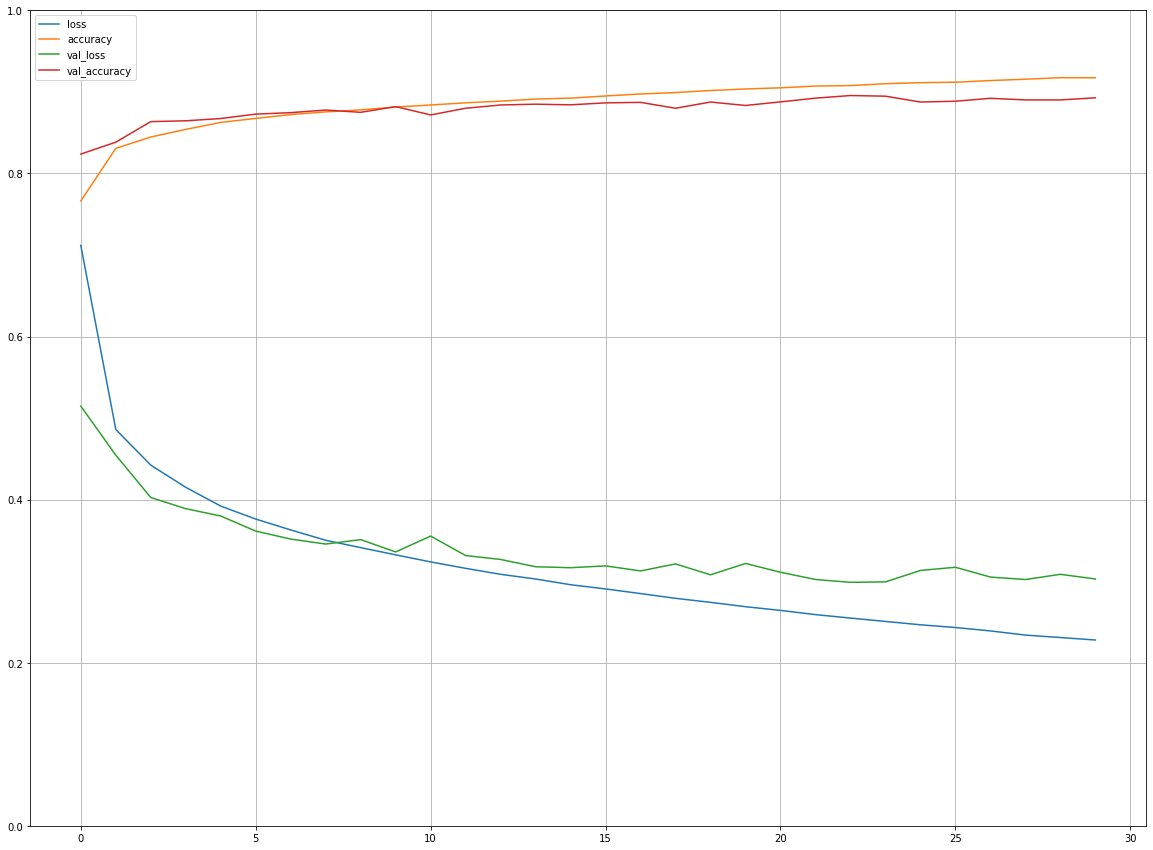

In [7]:

history = fit_model(
    model_we_have=model,
    x_train_df=X_train,  
    y_train_df=y_train,
    x_valid_df=X_valid,  
    y_valid_df=y_valid,
)

## Evaluate our model and make predictions.

In [8]:
"""
Evaluate the model on test sets
"""

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 78.5248 - accuracy: 0.8179


[78.52484893798828, 0.8179000020027161]

In [14]:
"""
Using the Model to Make Predictions
"""
X_new = X_test[:5]
y_proba = model.predict(X_new)
print(y_proba.round(1))

print("The model estimates one probability per class, from class 0 to class 9. ")
print("For example, for the first image it estimates that the probability of class 9 (ankle boot) is 100%")
print("For the second image the probability of class 2 (sneaker) is 100%,")


1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
The model estimates one probability per class, from class 0 to class 9. 
For example, for the first image it estimates that the probability of class 9 (ankle boot) is 100%
For the second image the probability of class 2 (sneaker) is 100%,


In [21]:
"""If you only care about the class with the highest estimated
probability (even if that probability is quite low) then you can use the predict_classes() method instead:"""

y_pred = (model.predict(X_new) > 0.5).astype("int32")
max_prob_index = np.argmax(y_pred, axis=1)
print("Predicted classification", max_prob_index)
#print(y_pred)
#print(np.array(class_names)[y_pred])


1/1 [==============================] - 0s 18ms/step
Predicted classification [9 2 1 1 6]


In [22]:
y_new = y_test[:5]
print("Check the actual classification on test", y_new)

Check the actual classification on test [9 2 1 1 6]
